In [1]:
import numpy as np
import pandas as pd

In [ ]:
df_5= pd.read_json(r'5core_Home_and_Kitchen_nijianmo.json',
                           lines=True, chunksize=1000)

L = [x for x in df_5]

rev_5 = pd.concat(L)

rev_5.shape

# Deal with duplicate asin products in 5-core file:

In [ ]:
with open(r'duplicates_all_products.txt') as f:
    lines = f.readlines()

lines_split = [line.split() for line in lines]

In [ ]:
unique_asin = {}
for line in lines_split:
    u_asin = line[0]
    for i, asin in enumerate(line):
        if i >= 1:
            unique_asin[asin] = u_asin

In [ ]:
def get_unique_asin(asin):
    if asin in unique_asin:
        return unique_asin[asin]
    return asin

In [ ]:
rev_5['unique_asin'] = rev_5.asin.apply(get_unique_asin)

In [ ]:
rev_5_sample = rev_5.iloc[:10_000]

In [ ]:
rev_5[rev_5.asin != rev_5.unique_asin]

# Find asins with most number of reviews in 5-core:

In [29]:
rev_5_asin = rev_5.groupby('unique_asin').count()

<AxesSubplot:>

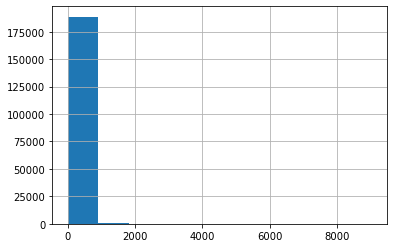

In [30]:
rev_5_asin.overall.hist()

<AxesSubplot:>

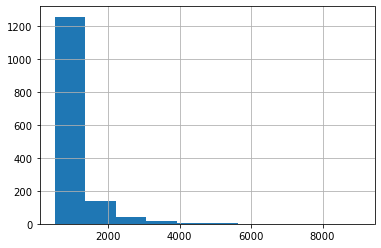

In [34]:
rev_5_asin.overall[rev_5_asin.overall>500].hist()

<AxesSubplot:>

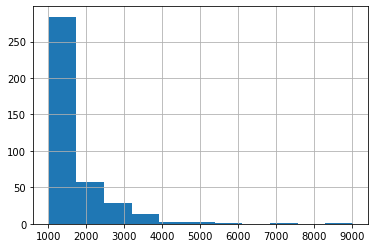

In [47]:
rev_5_asin.overall[rev_5_asin.overall>1000].hist(bins=11)

<AxesSubplot:>

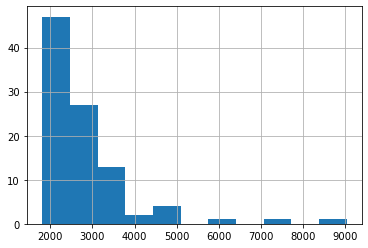

In [49]:
rev_5_asin.overall[rev_5_asin.overall>1800].hist(bins=11)

<AxesSubplot:>

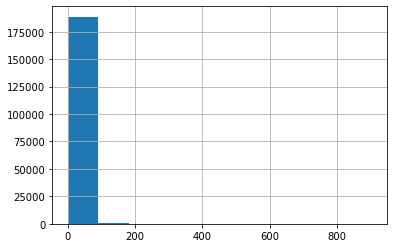

In [50]:
rev_5_asin.overall.apply(lambda x: x//10).hist()

In [56]:
rev_5_asin.overall.describe(percentiles=np.linspace(0.9, 1.0, num=11))

count    189171.000000
mean         36.469411
std         110.658900
min           1.000000
50%          12.000000
90%          70.000000
91%          78.000000
92%          87.000000
93%          98.000000
94%         113.000000
95%         131.000000
96%         158.000000
97%         197.000000
98%         269.000000
99%         430.000000
100%       9030.000000
max        9030.000000
Name: overall, dtype: float64

In [57]:
rev_5_asin.overall.describe(percentiles=np.linspace(0.95, 1.0, num=11))

count    189171.000000
mean         36.469411
std         110.658900
min           1.000000
50%          12.000000
95%         131.000000
95.5%       143.000000
96%         158.000000
96.5%       175.000000
97%         197.000000
97.5%       228.000000
98%         269.000000
98.5%       329.000000
99%         430.000000
99.5%       646.000000
100%       9030.000000
max        9030.000000
Name: overall, dtype: float64

In [58]:
rev_5_asin.overall.describe(percentiles=np.linspace(0.99, 1.0, num=11))

count    189171.000000
mean         36.469411
std         110.658900
min           1.000000
50%          12.000000
99%         430.000000
99.1%       459.000000
99.2%       490.000000
99.3%       535.000000
99.4%       582.980000
99.5%       646.000000
99.6%       724.000000
99.7%       826.490000
99.8%      1025.320000
99.9%      1433.000000
100%       9030.000000
max        9030.000000
Name: overall, dtype: float64

In [66]:
high_rev_asin = rev_5_asin[rev_5_asin.overall>1432].index.tolist()

In [2]:
rev_5_asin[rev_5_asin.overall>1432].sort_values('overall', ascending=False).to_pickle("./high_rev_asin_freq.pkl")

NameError: name 'rev_5_asin' is not defined

In [74]:
rev_5_asin[rev_5_asin.overall>1432].sort_values('overall', ascending=False)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
unique_asin,,,,,,,,,,,,
B00FLYWNYQ,9030,9030,9030,9030,9030,9029,9027,9028,9030,1290,9024,163
B000YGEVMI,7366,7366,7366,7366,7366,7366,7360,7366,7366,238,7286,90
B0015TMHSI,5851,5851,5851,5851,5851,5851,5851,5849,5851,438,5825,39
B00COK3FD8,5014,5014,5014,5014,5014,5013,5014,5012,5014,97,5014,37
B009HVH4XO,4835,4835,4835,4835,4835,4835,4835,4835,4835,119,4787,64
...,...,...,...,...,...,...,...,...,...,...,...,...
B013395BRQ,1437,1437,1437,1437,1437,1437,1437,1437,1437,141,1300,8
B00151WA06,1437,1437,1437,1437,1437,1437,1437,1437,1437,88,1431,6
B00G2XGC88,1434,1434,1434,1434,1434,1434,1433,1434,1434,98,1432,19


In [76]:
rel_5_review = rev_5[rev_5.unique_asin.apply(lambda x: x in high_rev_asin)]

In [77]:
rel_5_review.shape

(417181, 13)

In [78]:
rel_5_review.to_pickle("./reviews_on_freq_asin.pkl")

In [3]:
high_review = pd.read_pickle("./high_rev_asin_freq.pkl").index.tolist()

In [5]:
len(high_review)

191

In [4]:
L2 = []
count = 0
for reader in pd.read_json(r'meta_Home_and_Kitchen.json',
                           lines=True, nrows=2_000_000, chunksize=30_000):
    print('count', count)
    count += 1
    reader['unique_asin'] = reader['asin'].apply(get_unique_asin)
    exciting = reader[reader.unique_asin.apply(lambda x: x in high_review)]
    if len(exciting) > 1:
        L2.append(exciting)
        print(len(exciting))

count 0


NameError: name 'get_unique_asin' is not defined

In [58]:
high_review_meta = pd.concat(L2)

In [59]:
high_review_meta.shape

(201, 20)

In [15]:
pd.concat(L2).to_pickle("./high_review_meta.pkl")

# Identify and discard no-price asins

In [31]:
import re

In [60]:
high_review_meta.price = high_review_meta.price.apply(lambda x: re.sub('^\$', '', x))

In [85]:
def num_or_nothing(p):
    try:
        return float(p)
    except:
        if p == '':
            return np.nan
        return p

In [86]:
high_review_meta.price = high_review_meta.price.apply(num_or_nothing)

In [94]:
def is_number_or_nan(x):
    try:
        return x==float(x) or np.isnan(x)
    except:
        return False

In [95]:
high_review_meta[~high_review_meta.price.apply(is_number_or_nan)]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
41319,"[Home & Kitchen, Kitchen & Dining, Cookware, C...",,"[<div class=""aplus""> <div class=""rightImage""><...",,Ball Mason Wide Mouth Quart Jars with Lids and...,"[B000SSN3L2, B071KTNCSC, B00JV27MF4, B016YNPH0...",,Jarden,[],[>#306 in Kitchen & Dining (See Top 100 in Kit...,"[B07FF99TV4, B07FFCBVJW, B07FFD9XFF, B00WT3OZD...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","September 9, 2003",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000BWZ7QO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B000BWZ7QO
85318,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",,[The Swissmar V-Prep V-Slicer Mandoline set is...,,"Swissmar Borner V-Prep Mandoline V-5000, 7 Pie...","[B00MXUHHGK, B001QXZORE, B00IVM1TKO, B00W5DMX3...",,Swissmar,[],"[>#4,175 in Kitchen & Dining (See Top 100 in K...",[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","September 3, 2007",.a-box-inner{background-color:#fff}#alohaBuyBo...,B000VZRZE8,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B000VZRZE8


In [97]:
#high_review_meta.price[41319]

In [99]:
#high_review_meta.price[85318]

In [101]:
def is_number(x):
    try:
        return x==float(x)
    except:
        return False

In [107]:
len(high_review_meta[~high_review_meta.price.apply(is_number)])

25

In [111]:
high_review_meta_no_price = high_review_meta[~high_review_meta.price.apply(is_number)].unique_asin.tolist()

price_hopeful=[]
hopeless=[]
for priceless in high_review_meta_no_price:
    found = False
    for line in lines:
        if priceless in line:
            price_hopeful.append(line)
            found = True
            break
    if not found:
        hopeless.append(priceless)
    
len(price_hopeful)

19

In [112]:
len(hopeless)

6

In [121]:
need_price = []
for line in price_hopeful:
    for x in line.split():
        need_price.append(x)

In [123]:
L3 = []
count = 0
for reader in pd.read_json(r'meta_Home_and_Kitchen.json',
                           lines=True, nrows=2_000_000, chunksize=30_000):
    print('count', count)
    count += 1
    exciting = reader[reader.asin.apply(lambda x: x in need_price)]
    if len(exciting) > 1:
        L3.append(exciting)
        print(len(exciting))

count 0
6
count 1
count 2
2
count 3
4
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
2
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43


In [124]:
pd.concat(L3).to_pickle("./dig_price.pkl")

In [126]:
pd.concat(L3).price

4366      
5818      
11536     
19514     
20966     
26684     
77208     
84237     
92273     
100863    
100945    
106518    
526505    
529859    
Name: price, dtype: object

In [130]:
high_review_meta = high_review_meta[~high_review_meta.unique_asin.apply(lambda x: x in high_review_meta_no_price)]

In [131]:
high_review_meta.to_pickle("./high_review_meta.pkl")

In [5]:
rel_5_review = pd.read_pickle('reviews_on_freq_asin.pkl')

In [135]:
rel_5_review.shape

(417181, 13)

In [138]:
rel_5_review = rel_5_review[~rel_5_review.unique_asin.apply(lambda x: x in high_review_meta_no_price)]

In [139]:
rel_5_review.to_pickle("./reviews_on_freq_asin.pkl")

In [141]:
pd.read_pickle('high_review_meta.pkl').shape

(176, 20)

In [146]:
high_review_meta = pd.read_pickle('high_review_meta.pkl')

In [150]:
high_review_meta[high_review_meta.title.apply(lambda x: 'food processor' in x.lower())]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
276315,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[The Ninja Master Prep Professional handles al...,,Ninja Blender/Food Processor with 450-Watt Bas...,"[B001CQTLJM, B003XU3C7M, B07C6FP4HJ, B00ENOV2Y...",,SharkNinja,"[Interchangeable 450-watt power pod, 48 oz. pi...","[>#2,162 in Kitchen & Dining (See Top 100 in K...","[B003XU3C7M, B00HL3TBDQ, B071SHDNP1, B003QB575...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","April 25, 2010",60.28,B004XK4N9C,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B004XK4N9C


In [185]:
def product_in_list_col(product, L):
    for x in L:
        if product.lower() in x.lower():
            return True
    return False

In [187]:
high_review_meta[high_review_meta.description.apply(lambda x: product_in_list_col('food processor', x))]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin


In [159]:
#high_review_meta[high_review_meta.description.apply(lambda x: product_in_description('coffee maker', x))]

In [186]:
high_review_meta[high_review_meta.description.apply(lambda x: product_in_list_col('microwave', x))]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
1277440,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[<b> REDISCOVER THE JOY OF MAKING POPCORN WITH...,,"The Original Salbree Microwave Popcorn Popper,...","[B000RPYX4W, B00H727M6O, B00VJMJZ1I, B00382UXU...",,Salbree,[14 COLORS TO CHOOSE FROM - Search SALBREE to ...,[>#319 in Kitchen & Dining (See Top 100 in Kit...,"[B0742K3GCW, B07CWYQ53V, B01M1CJNXH, B07JF8PFC...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","May 26, 2016",17.9,B01G7SBOF8,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B01G7SBOF8


In [161]:
high_review_meta[high_review_meta.title.apply(lambda x: 'coffee maker' in x.lower())]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
100885,"[Home & Kitchen, Kitchen & Dining, Coffee, Tea...",,[Made from luxurious stainless steel. Makes 4 ...,,Presto 02811 12-Cup Stainless Steel Coffee Maker,"[B010QXCBDE, B01GFPS6GI, B00A7ZJNHO, B0151RCR9...",,Presto,"[Brews great-tasting coffee-rich, hot, and fla...",[>#768 in Kitchen & Dining (See Top 100 in Kit...,[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","October 31, 2003",6.52,B0014CX87U,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0014CX87U
139548,"[Home & Kitchen, Kitchen & Dining, Coffee, Tea...",,"[No matter how much you try, its impossible to...",,Hamilton Beach (48464) Coffee Maker with 12 C...,"[B0006FJ2RG, B004E2PUMS, B001R4LK1Q, B000Z4RKY...",,Hamilton Beach,[Enclosed brewing system with internal heater ...,"[>#2,768 in Kitchen & Dining (See Top 100 in K...","[B001R4LK1Q, B00AF7WUO2, B0052TKBNA, B008J8MJ9...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","November 10, 2008",5.45,B001K66LPQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B001K66LPQ


In [163]:
high_review_meta[high_review_meta.brand.str.lower() == 'kitchenaid']

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
3863,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Choose from over 20 different colors of the K...,,KitchenAid KSM150PSGR Artisan Series 5-Qt. Sta...,[],,KitchenAid,[10-speed slide control ranges from a very fas...,[>#85 in Kitchen & Dining (See Top 100 in Kitc...,"[B0001ZYYN8, B0044FH2TY, B00L1OHMZU, B00063ULM...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2002",43.01,B00005UP2N,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B00005UP2N
19011,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Choose from over 20 different colors of the K...,,KitchenAid KSM150PSGR Artisan Series 5-Qt. Sta...,[],,KitchenAid,[10-speed slide control ranges from a very fas...,[>#85 in Kitchen & Dining (See Top 100 in Kitc...,"[B0001ZYYN8, B0044FH2TY, B00L1OHMZU, B00063ULM...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","February 11, 2002",43.01,B00005UP2N,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B00005UP2N


In [164]:
high_review_meta.description[3863]

['Choose from over 20 different colors of the KitchenAid Artisan Series Tilt-Head Stand Mixer for the one that perfectly matches your kitchen design or personality. Easily make your favorite cakes and multiple batches of cookie dough with the 5-quart stainless steel mixing bowl with comfortable handle. With 10 speeds, the standmixer will quickly become your kitchens culinary center as you mix, knead and whip ingredients with ease. And for even more versatility, the power hub fits optional attachments from food grinders to pasta makers and more.',
 '1 Year Hassle Free Replacement Warranty']

In [165]:
high_review_meta.description[19011]

['Choose from over 20 different colors of the KitchenAid Artisan Series Tilt-Head Stand Mixer for the one that perfectly matches your kitchen design or personality. Easily make your favorite cakes and multiple batches of cookie dough with the 5-quart stainless steel mixing bowl with comfortable handle. With 10 speeds, the standmixer will quickly become your kitchens culinary center as you mix, knead and whip ingredients with ease. And for even more versatility, the power hub fits optional attachments from food grinders to pasta makers and more.',
 '1 Year Hassle Free Replacement Warranty']

In [178]:
high_review_meta = high_review_meta.drop_duplicates(subset='asin')

In [179]:
high_review_meta.to_pickle("./high_review_meta.pkl")

In [180]:
high_review_meta.to_csv("./high_review_meta.csv")

In [182]:
high_review_meta.to_excel("./high_review_meta.xlsx")

In [183]:
high_review_meta[high_review_meta.title.apply(lambda x: 'blender' in x.lower())]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
109296,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach 51101B Personal Blender with T...,,Hamilton Beach 51101B Personal Blender with Tr...,[],,Hamilton Beach,[NOTE:Kindly refer the video and user manual a...,"[>#45,475 in Kitchen & Dining (See Top 100 in ...",[],Amazon Home,,"May 19, 2008",18.5,B0017XHSAE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSAE
109304,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach Single-serve Blender With Trav...,,Hamilton Beach Personal Single Serve Blender w...,"[B00KVZ27UA, B004T4LYEO, B002V8ZEXW, B074TGMFD...",,Hamilton Beach,[Compact design ideal for small living spaces ...,[>#512 in Kitchen & Dining (See Top 100 in Kit...,"[B002V8ZEXW, B00KVZ27UA, B00065L6CU, B01GGRMB5...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","May 19, 2008",14.85,B0017XHSC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSC2
276315,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[The Ninja Master Prep Professional handles al...,,Ninja Blender/Food Processor with 450-Watt Bas...,"[B001CQTLJM, B003XU3C7M, B07C6FP4HJ, B00ENOV2Y...",,SharkNinja,"[Interchangeable 450-watt power pod, 48 oz. pi...","[>#2,162 in Kitchen & Dining (See Top 100 in K...","[B003XU3C7M, B00HL3TBDQ, B071SHDNP1, B003QB575...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","April 25, 2010",60.28,B004XK4N9C,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B004XK4N9C
361081,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,"[All the power you need to mix, puree, dice, c...",,Hamilton Beach 58148 Power Elite Multi-Functio...,"[B01LY020WD, B072P11H8L, B003OAJGJO, B00KHLN7K...",,Hamilton Beach,"[700-watt of peak blending power, 12 blending ...",[>#384 in Kitchen & Dining (See Top 100 in Kit...,[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","December 9, 2011",29.99,B006JXSCFC,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B006JXSCFC
481080,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[CSB-75PK Color: Pink Features: -Motor wattage...,,Cuisinart CSB-75PK Smart Stick 2-Speed Immersi...,"[B000TVQVB2, B01CUT54UE, B01GNYX6XE, B00GYRHCE...",,Cuisinart,"[This year, Cuisinart is donating $32,500, reg...",[>#348 in Kitchen & Dining (See Top 100 in Kit...,"[B002RWJN4S, B077T5F3D2, B005MMNBBQ, B075X1KPL...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","January 15, 2013",24.42,B00ARQVLGO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B00ARQVLGO


In [188]:
high_review_meta[high_review_meta.description.apply(lambda x: product_in_list_col('blender', x))]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
109296,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach 51101B Personal Blender with T...,,Hamilton Beach 51101B Personal Blender with Tr...,[],,Hamilton Beach,[NOTE:Kindly refer the video and user manual a...,"[>#45,475 in Kitchen & Dining (See Top 100 in ...",[],Amazon Home,,"May 19, 2008",18.5,B0017XHSAE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSAE
109304,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach Single-serve Blender With Trav...,,Hamilton Beach Personal Single Serve Blender w...,"[B00KVZ27UA, B004T4LYEO, B002V8ZEXW, B074TGMFD...",,Hamilton Beach,[Compact design ideal for small living spaces ...,[>#512 in Kitchen & Dining (See Top 100 in Kit...,"[B002V8ZEXW, B00KVZ27UA, B00065L6CU, B01GGRMB5...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","May 19, 2008",14.85,B0017XHSC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSC2
481080,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[CSB-75PK Color: Pink Features: -Motor wattage...,,Cuisinart CSB-75PK Smart Stick 2-Speed Immersi...,"[B000TVQVB2, B01CUT54UE, B01GNYX6XE, B00GYRHCE...",,Cuisinart,"[This year, Cuisinart is donating $32,500, reg...",[>#348 in Kitchen & Dining (See Top 100 in Kit...,"[B002RWJN4S, B077T5F3D2, B005MMNBBQ, B075X1KPL...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","January 15, 2013",24.42,B00ARQVLGO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B00ARQVLGO


In [189]:
high_review_meta[high_review_meta.category.apply(lambda x: product_in_list_col('blender', x))]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,unique_asin
109296,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach 51101B Personal Blender with T...,,Hamilton Beach 51101B Personal Blender with Tr...,[],,Hamilton Beach,[NOTE:Kindly refer the video and user manual a...,"[>#45,475 in Kitchen & Dining (See Top 100 in ...",[],Amazon Home,,"May 19, 2008",18.5,B0017XHSAE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSAE
109304,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[Hamilton Beach Single-serve Blender With Trav...,,Hamilton Beach Personal Single Serve Blender w...,"[B00KVZ27UA, B004T4LYEO, B002V8ZEXW, B074TGMFD...",,Hamilton Beach,[Compact design ideal for small living spaces ...,[>#512 in Kitchen & Dining (See Top 100 in Kit...,"[B002V8ZEXW, B00KVZ27UA, B00065L6CU, B01GGRMB5...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","May 19, 2008",14.85,B0017XHSC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B0017XHSC2
276315,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[The Ninja Master Prep Professional handles al...,,Ninja Blender/Food Processor with 450-Watt Bas...,"[B001CQTLJM, B003XU3C7M, B07C6FP4HJ, B00ENOV2Y...",,SharkNinja,"[Interchangeable 450-watt power pod, 48 oz. pi...","[>#2,162 in Kitchen & Dining (See Top 100 in K...","[B003XU3C7M, B00HL3TBDQ, B071SHDNP1, B003QB575...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","April 25, 2010",60.28,B004XK4N9C,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B004XK4N9C
361081,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,"[All the power you need to mix, puree, dice, c...",,Hamilton Beach 58148 Power Elite Multi-Functio...,"[B01LY020WD, B072P11H8L, B003OAJGJO, B00KHLN7K...",,Hamilton Beach,"[700-watt of peak blending power, 12 blending ...",[>#384 in Kitchen & Dining (See Top 100 in Kit...,[],Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","December 9, 2011",29.99,B006JXSCFC,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B006JXSCFC
481080,"[Home & Kitchen, Kitchen & Dining, Small Appli...",,[CSB-75PK Color: Pink Features: -Motor wattage...,,Cuisinart CSB-75PK Smart Stick 2-Speed Immersi...,"[B000TVQVB2, B01CUT54UE, B01GNYX6XE, B00GYRHCE...",,Cuisinart,"[This year, Cuisinart is donating $32,500, reg...",[>#348 in Kitchen & Dining (See Top 100 in Kit...,"[B002RWJN4S, B077T5F3D2, B005MMNBBQ, B075X1KPL...",Amazon Home,"class=""a-bordered a-horizontal-stripes a-spa...","January 15, 2013",24.42,B00ARQVLGO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},B00ARQVLGO
